### Determine The Reference Performance
- Exploratory Data Analysis continued
  - Analyse specific ETFs and Stocks
  - Plot their price charts
  - Compare their performance
  - See how they correlate

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import pickle
import itertools

In [2]:
# change into Dataset't directory
os.chdir("../dataset")

In [3]:
# Load previously saved pickles

# load objects
with open("3_1_baseline_performance.pckl", "rb") as f:
    %time baseline_performance = pickle.load(f)

CPU times: user 341 µs, sys: 536 µs, total: 877 µs
Wall time: 846 µs


In [4]:
with open("3_1_avg_stocks.pckl", "rb") as f:
    %time avg_Stocks = pickle.load(f)

CPU times: user 182 µs, sys: 114 µs, total: 296 µs
Wall time: 271 µs


In [5]:
with open("3_1_avg_etfs.pckl", "rb") as f:
    %time avg_ETFs = pickle.load(f)

CPU times: user 125 µs, sys: 195 µs, total: 320 µs
Wall time: 271 µs


In [6]:
with open("3_1_stock.pckl", "rb") as f:
    %time Stocks = pickle.load(f)

CPU times: user 809 ms, sys: 237 ms, total: 1.05 s
Wall time: 1.05 s


In [7]:
with open("3_1_etfs.pckl", "rb") as f:
    %time ETFs = pickle.load(f)

CPU times: user 16.2 ms, sys: 0 ns, total: 16.2 ms
Wall time: 15.8 ms


In [8]:
# Get symbol real names
ndt_reference = pd.read_csv("ndt_reference.csv")
ndt_reference.head()

,Unnamed: 0,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,2,Y,AAA,Investment Managers Series Trust II AXS First ...,P,,Y,100.0,N,NaN,AAA,AAA,N
3,3,Y,AAAU,Goldman Sachs Physical Gold ETF Shares,Z,,Y,100.0,N,NaN,AAAU,AAAU,N
4,4,Y,AAC,Ares Acquisition Corporation Class A Ordinary ...,N,,N,100.0,N,NaN,AAC,AAC,N


In [9]:
avg_ETFs = pd.merge(avg_ETFs, ndt_reference[["Symbol", "Security Name"]], on="Symbol")

In [10]:
avg_Stocks = pd.merge(avg_Stocks, ndt_reference[["Symbol", "Security Name"]], on="Symbol")

In [11]:
print("The list of ETFs")
avg_ETFs[["Symbol", "Security Name", "Current pct_change"]]

The list of ETFs


,Symbol,Security Name,Current pct_change
0,EWL,iShares Inc iShares MSCI Switzerland ETF,3.013875
1,XLK,SPDR Select Sector Fund - Technology,3.121449
2,EWC,iShares MSCI Canada Index Fund,2.973889
3,XLF,SPDR Select Sector Fund - Financial,2.750948
4,EWO,iShares Inc iShares MSCI Austria ETF,2.584267
5,QQQ,"Invesco QQQ Trust, Series 1",3.589787
6,SPY,SPDR S&P 500,3.627273


In [12]:
print("The list of Stocks")
avg_Stocks[["Symbol", "Security Name", "Current pct_change"]]

The list of Stocks


,Symbol,Security Name,Current pct_change
0,ZEUS,"Olympic Steel, Inc. - Common Stock",11.694638
1,RGR,"Sturm, Ruger & Company, Inc. Common Stock",11.702276
2,BWA,BorgWarner Inc. Common Stock,11.707241
3,ECL,Ecolab Inc. Common Stock,11.647079
4,SHYF,"The Shyft Group, Inc. - Common Stock",11.645839
5,PZZA,"Papa John's International, Inc. - Common Stock",11.787230
6,CASS,"Cass Information Systems, Inc - Common Stock",11.583909


### Inspect the avarage ETF prices visually

In [13]:
# Combine ETFs' Close prices in one DataFrame
date_set = False
ETFs_prices = pd.DataFrame()

for index, row in avg_ETFs.iterrows():
    symbol = row["Symbol"]
    if not date_set:
        ETFs_prices["Date"] = ETFs[symbol]["Date"]
        date_set = True
    ETFs_prices[symbol] = ETFs[symbol]["Adj Close"]

ETFs_prices.head()

,Date,EWL,XLK,EWC,XLF,EWO,QQQ,SPY
Date,,,,,,,,
2000-01-03,2000-01-03,11.442809,42.751957,8.789878,9.248327,5.655271,82.267441,97.506668
2000-01-04,2000-01-04,11.094737,40.583042,8.393343,8.844025,5.615444,76.623764,93.693573
2000-01-05,2000-01-05,11.225265,39.980549,8.558568,8.774538,5.695096,74.670212,93.861176
2000-01-06,2000-01-06,11.225265,38.655117,8.459435,9.159883,5.695096,69.542053,92.352676
2000-01-07,2000-01-07,11.573333,39.329876,8.591611,9.311501,6.053528,78.143234,97.716209


In [14]:
ETFs_prices.describe()

,EWL,XLK,EWC,XLF,EWO,QQQ,SPY
count,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000
mean,23.335496,45.981338,21.064742,16.221625,15.402936,106.564825,171.326537
std,11.788383,42.536913,8.311273,8.972495,6.072450,98.931966,112.604175
min,6.658945,8.930201,5.766855,3.068984,4.365574,17.417257,53.155308
25%,12.720385,17.639490,13.852406,9.976231,11.859705,36.403812,88.301949
50%,19.742582,26.014860,22.679607,12.776107,15.266085,61.093704,112.424484
75%,31.259892,56.355822,26.029679,22.618418,20.112888,142.035995,233.683655
max,53.020000,180.259995,40.660000,41.419998,28.348576,403.989990,477.709991


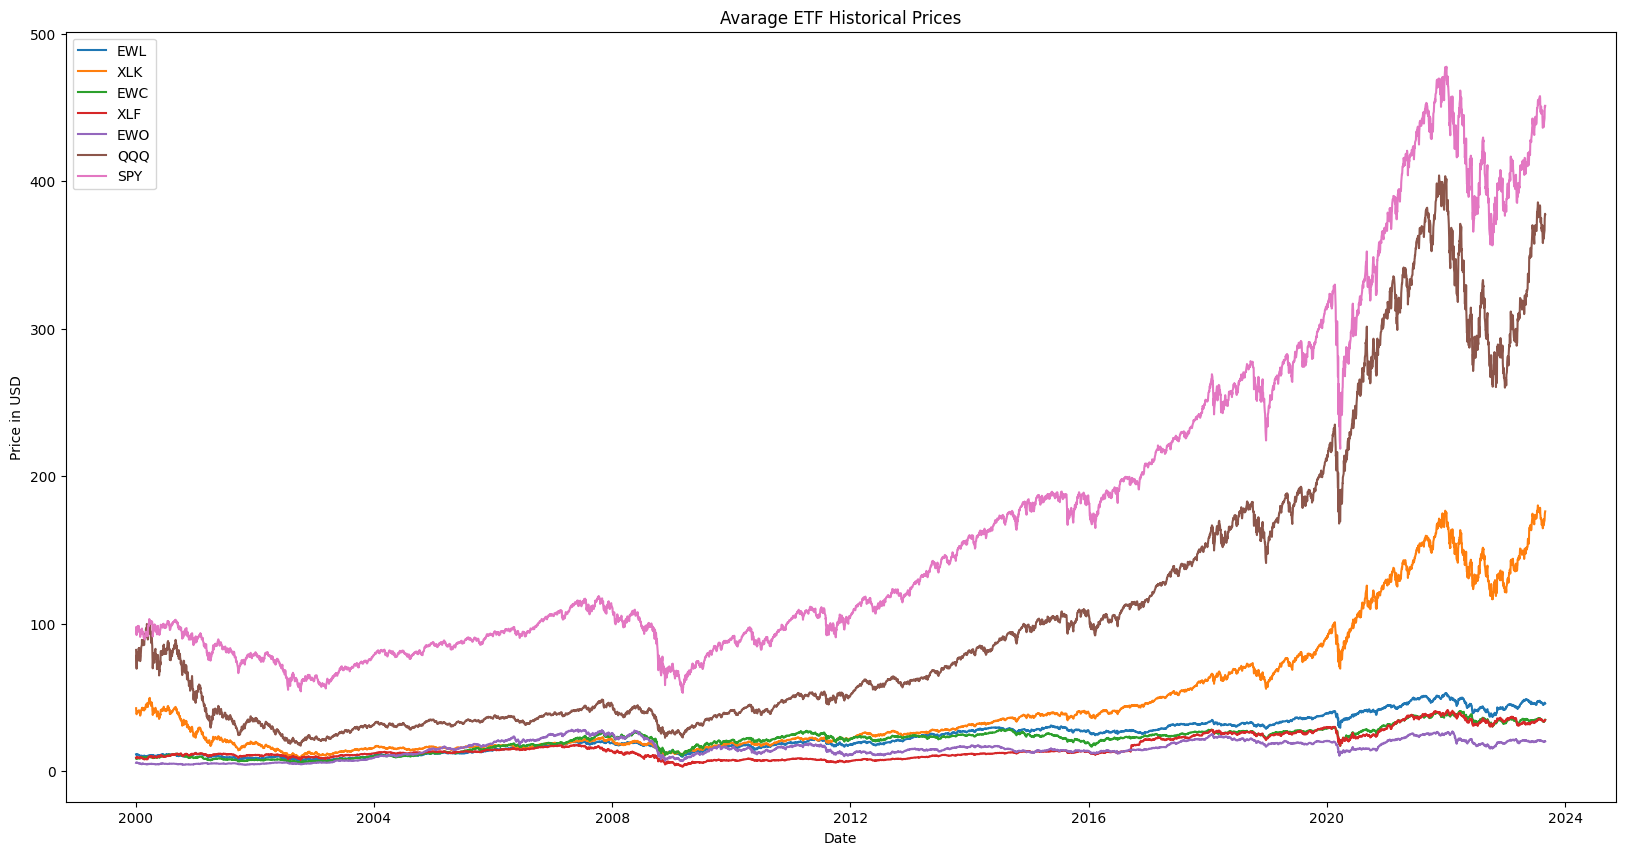

In [15]:
# Plot ETFs' prices
plt.figure(figsize=(20,10))

for column in ETFs_prices.columns[1:]:
    plt.plot(ETFs_prices.index, ETFs_prices[column], label=column)

plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.title("Avarage ETF Historical Prices")
plt.show()

In [16]:
# Calculate daily returns and isu it for correlation

ETFs_prices_daily_change = ETFs_prices[[column for column in ETFs_prices.columns[1:]]].pct_change(1)
ETFs_prices_daily_change.head()

,EWL,XLK,EWC,XLF,EWO,QQQ,SPY
Date,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.030418,-0.050733,-0.045113,-0.043716,-0.007042,-0.068602,-0.039106
2000-01-05,0.011765,-0.014846,0.019685,-0.007857,0.014184,-0.025495,0.001789
2000-01-06,0.000000,-0.033152,-0.011583,0.043916,0.000000,-0.068677,-0.016072
2000-01-07,0.031008,0.017456,0.015625,0.016552,0.062937,0.123683,0.058077


<Axes: >

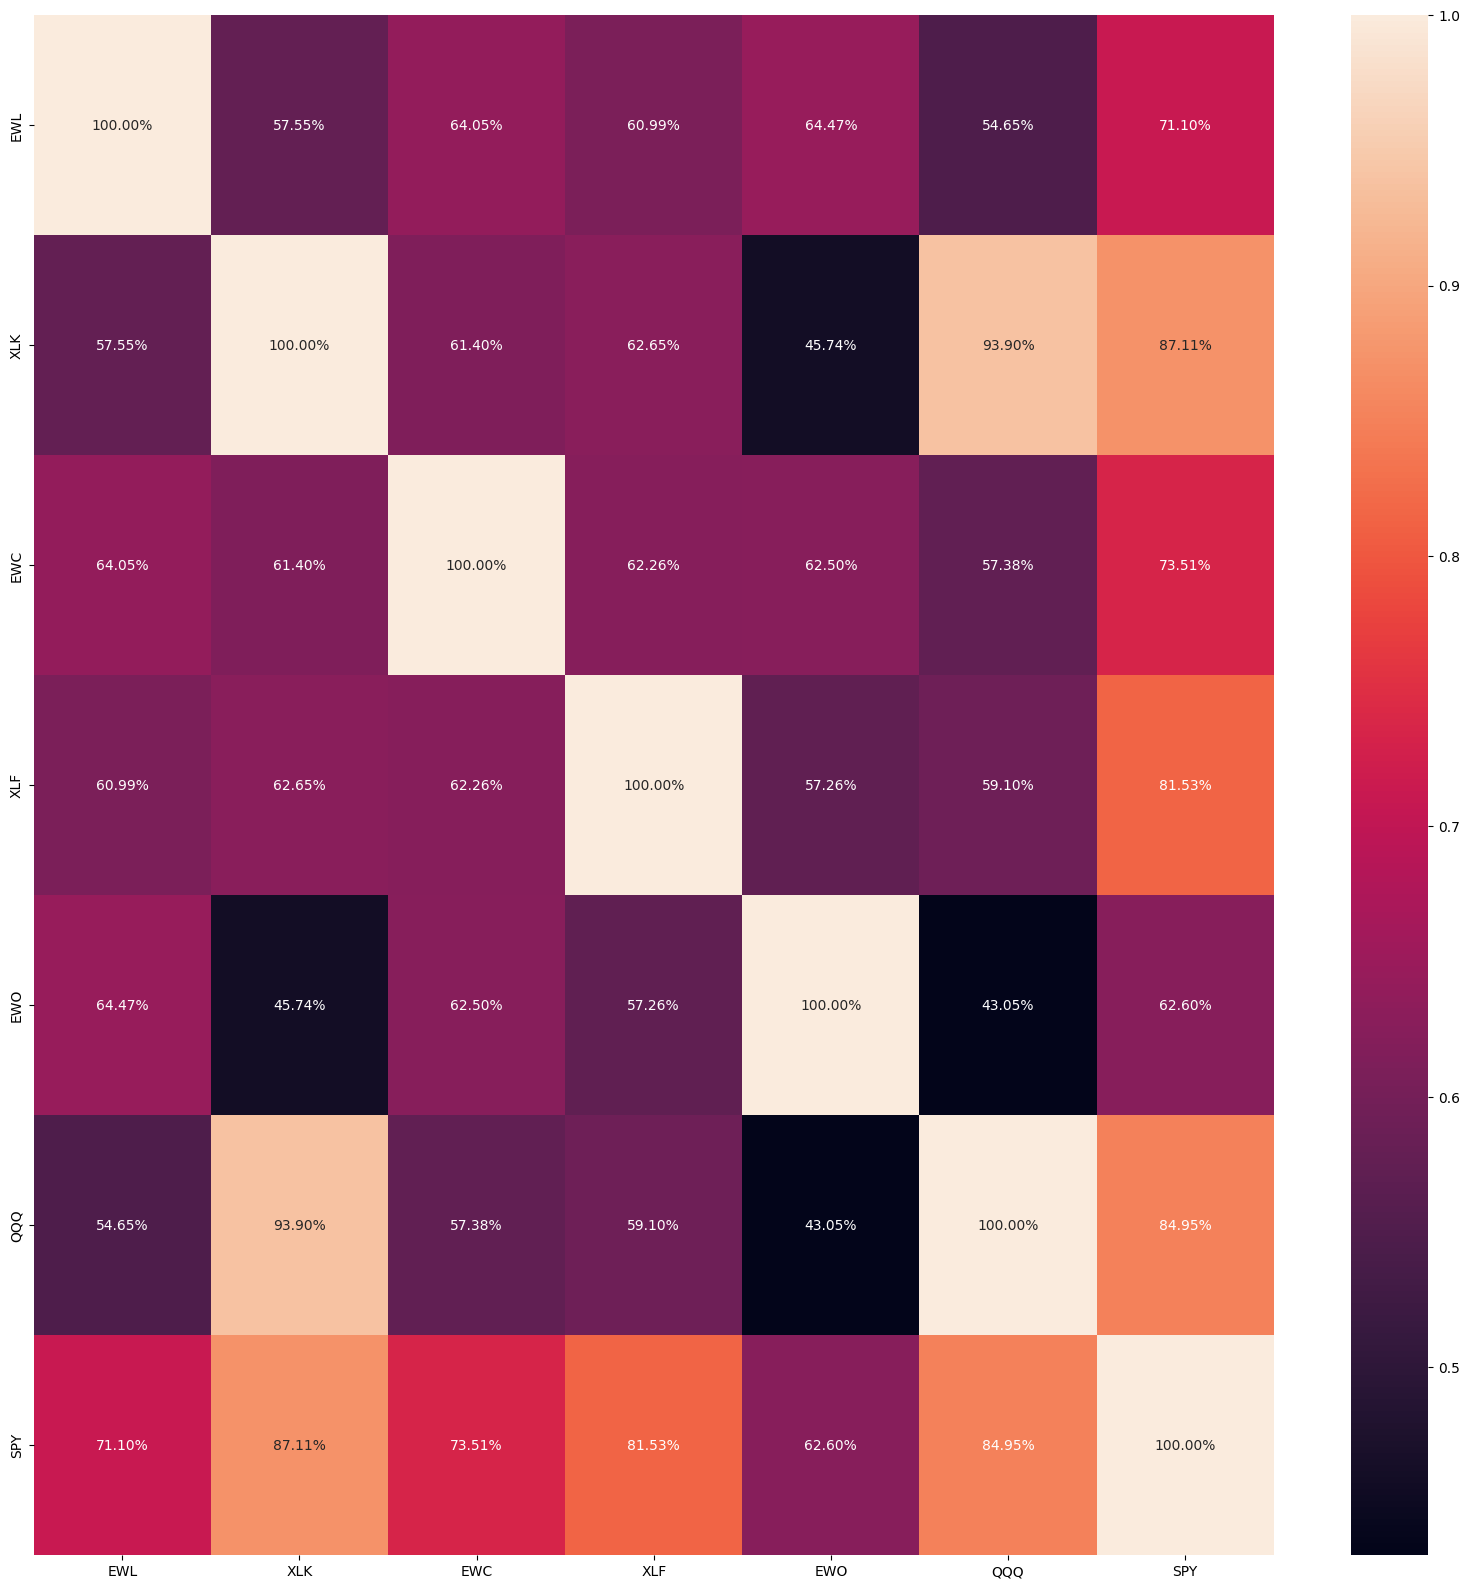

In [17]:
# Show the correlation
plt.subplots(figsize=(20,20))
sns.heatmap(ETFs_prices_daily_change.corr(), annot=True, fmt=".2%")

<Axes: >

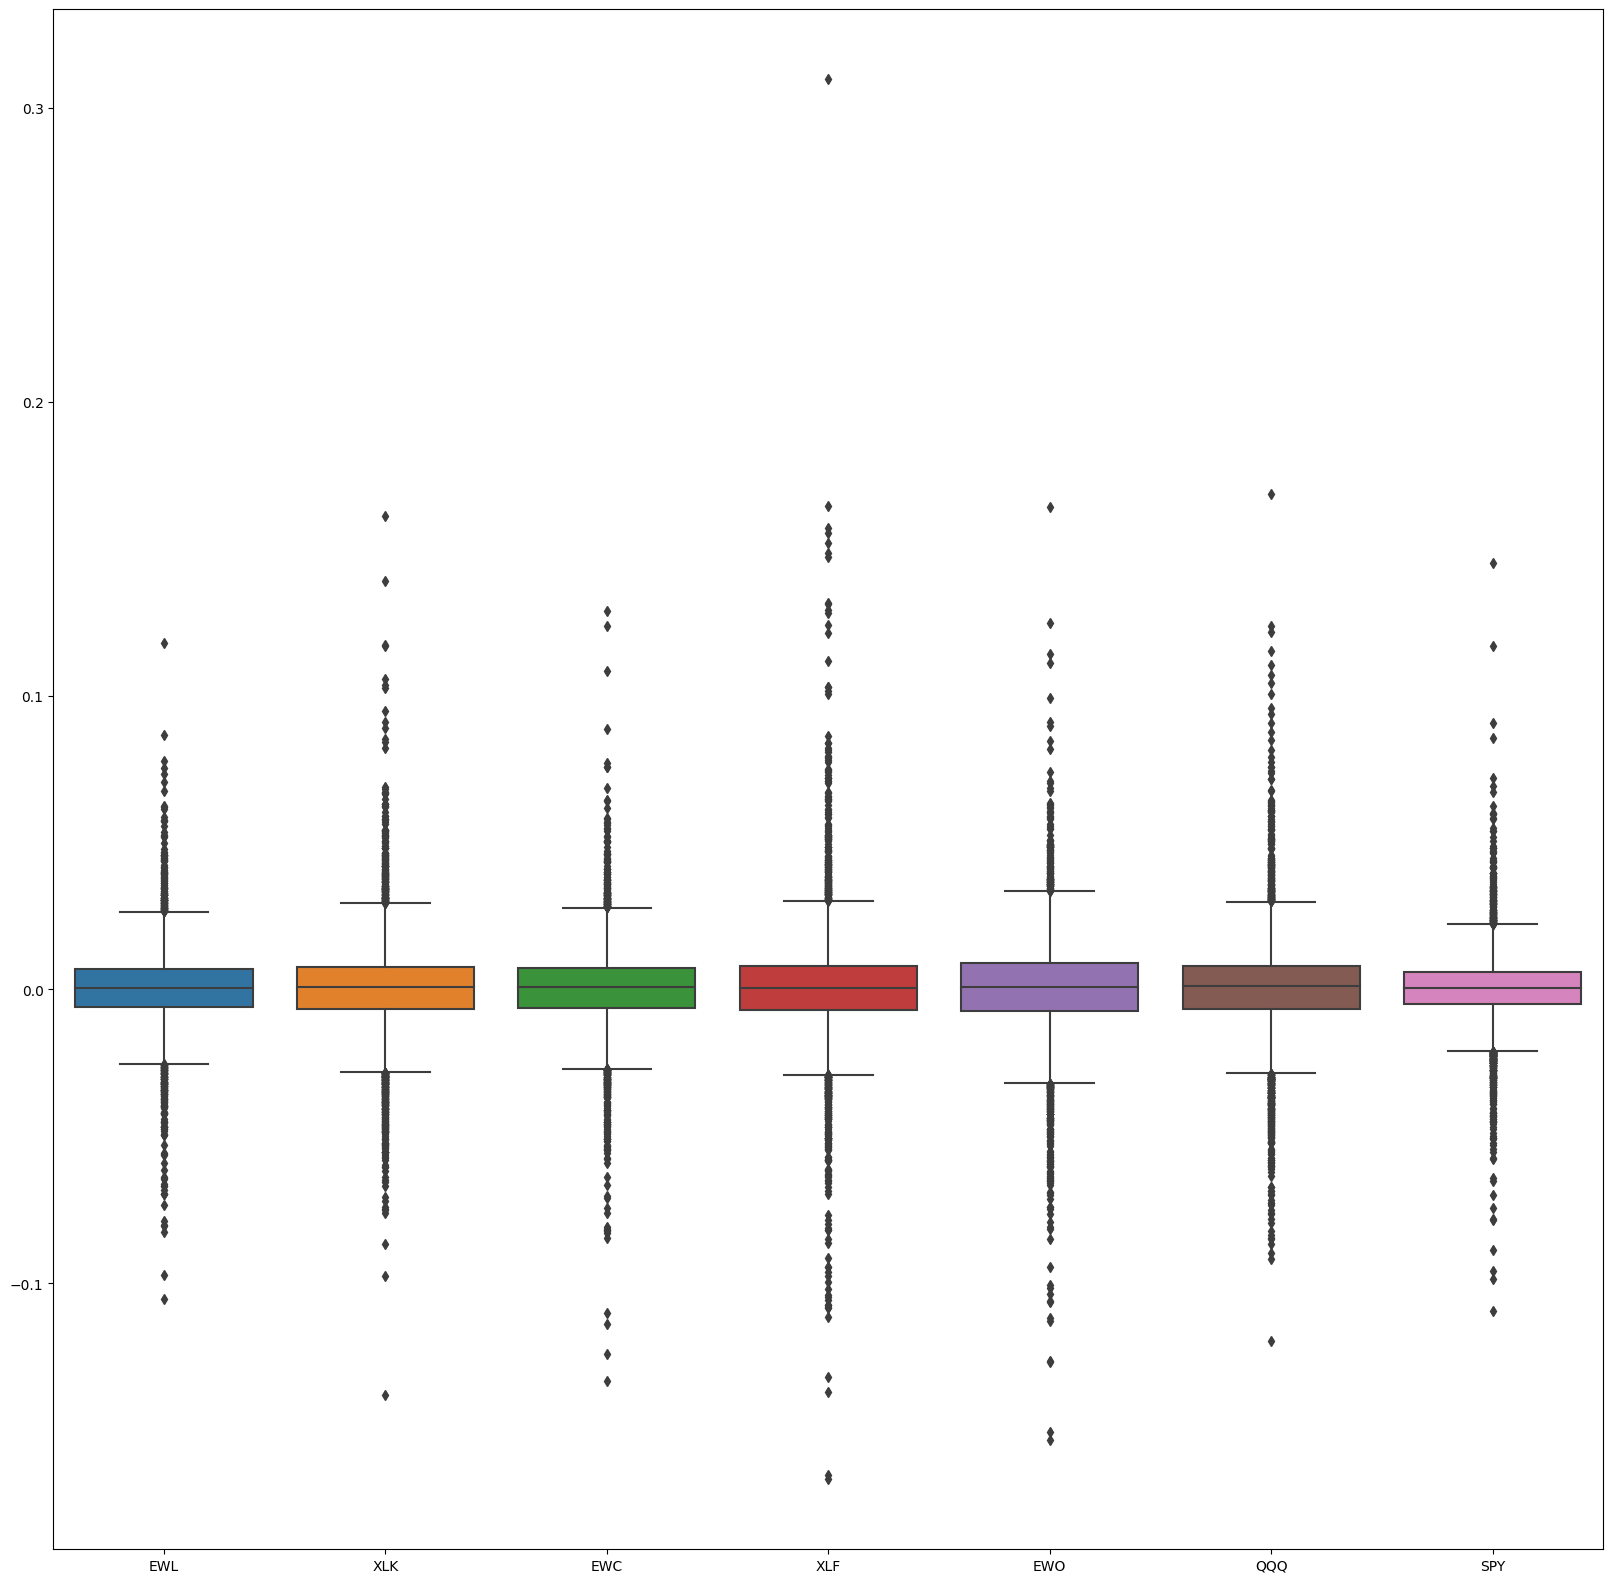

In [18]:
# Plot the returns width their percentiles
plt.subplots(figsize=(20,20))
sns.boxplot(ETFs_prices_daily_change)

In [19]:
# Check the co-variance for the symbols
ETFs_prices_daily_change.cov()

,EWL,XLK,EWC,XLF,EWO,QQQ,SPY
EWL,0.000174,0.000124,0.000121,0.000152,0.000145,0.000125,0.000116
XLK,0.000124,0.000269,0.000145,0.000195,0.000128,0.000266,0.000177
EWC,0.000121,0.000145,0.000207,0.000170,0.000153,0.000143,0.000131
XLF,0.000152,0.000195,0.000170,0.000360,0.000185,0.000194,0.000192
EWO,0.000145,0.000128,0.000153,0.000185,0.000291,0.000127,0.000133
QQQ,0.000125,0.000266,0.000143,0.000194,0.000127,0.000299,0.000182
SPY,0.000116,0.000177,0.000131,0.000192,0.000133,0.000182,0.000154


In [20]:
# Calculate volatilitiy
ETFs_stats = pd.DataFrame()
ETFs_stats["Volatility"] = (ETFs_prices_daily_change.std() * 100)

# Calculate avarage daily returns %
ETFs_stats["Daily Return %"] = (ETFs_prices_daily_change.mean() * 100)

# Calculate avarage yearly returns % (approx to 252 avarage trading days / year)
ETFs_stats["Yearly Return %"] = (ETFs_prices_daily_change.mean() * 100 * 252)

ETFs_stats

,Volatility,Daily Return %,Yearly Return %
EWL,1.317572,0.032046,8.075710
XLK,1.639194,0.037189,9.371595
EWC,1.437909,0.033559,8.456826
XLF,1.897438,0.040048,10.092181
EWO,1.705665,0.036099,9.096845
QQQ,1.729070,0.040520,10.210945
SPY,1.241737,0.033448,8.428791


<Figure size 4000x1000 with 0 Axes>

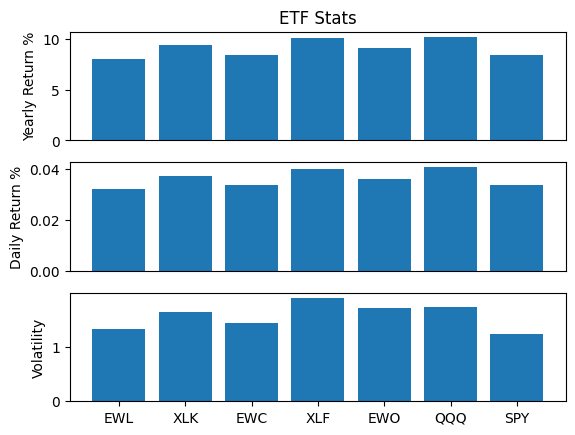

In [21]:
# Plot ETFs Stats

plt.figure(figsize=(40, 10))
fig, axis = plt.subplots(3, 1)


axis[2].bar(ETFs_stats.index, ETFs_stats["Volatility"])
axis[2].set_ylabel("Volatility")

axis[1].bar(ETFs_stats.index, ETFs_stats["Daily Return %"])
axis[1].set_ylabel("Daily Return %")
axis[1].xaxis.set_visible(False)

axis[0].set_title("ETF Stats")
axis[0].bar(ETFs_stats.index, ETFs_stats["Yearly Return %"])
axis[0].set_ylabel("Yearly Return %")
axis[0].xaxis.set_visible(False)
plt.show()

### Inspect the avarage Stocks prices visually
And add some additional symbols of some knows companies like Coca Cola, Apple, Shell and IBM.

In [22]:
# Add additional symbols and refresh security names
avg_Stocks.drop(columns=["Security Name"], inplace=True)

avg_Stocks = pd.concat([avg_Stocks, baseline_performance[baseline_performance["Symbol"] == "KO"]])
avg_Stocks = pd.concat([avg_Stocks, baseline_performance[baseline_performance["Symbol"] == "AAPL"]])
avg_Stocks = pd.concat([avg_Stocks, baseline_performance[baseline_performance["Symbol"] == "SHEL"]])
avg_Stocks = pd.concat([avg_Stocks, baseline_performance[baseline_performance["Symbol"] == "IBM"]])

avg_Stocks = pd.merge(avg_Stocks, ndt_reference[["Symbol", "Security Name"]], on="Symbol")

In [23]:
avg_Stocks

,Symbol,First Date,First Adj Close,Highest Adj Close Date,Highest Adj Close,Lowest Adj Close Date,Lowest Adj Close,Current Adj Close Date,Current Adj Close,ETF,Highest pct_change,Lowest pct_change,Current pct_change,Security Name
0,ZEUS,2000-01-03,4.378227,2008-06-30,69.836151,2000-10-25,1.705803,2023-09-01,55.580002,False,14.950784,-0.610390,11.694638,"Olympic Steel, Inc. - Common Stock"
1,RGR,2000-01-03,4.076435,2021-06-30,87.934952,2008-11-20,3.048036,2023-09-01,51.779999,False,20.571535,-0.252279,11.702276,"Sturm, Ruger & Company, Inc. Common Stock"
2,BWA,2000-01-03,3.249329,2014-07-09,51.952221,2000-02-24,2.537365,2023-09-01,41.290001,False,14.988602,-0.219111,11.707241,BorgWarner Inc. Common Stock
3,ECL,2000-01-03,14.446023,2021-12-29,235.639999,2000-02-29,10.828531,2023-09-01,182.699997,False,15.311756,-0.250414,11.647079,Ecolab Inc. Common Stock
4,SHYF,2000-01-03,1.290543,2021-11-17,54.250000,2000-12-28,0.418953,2023-09-01,16.320000,False,41.036567,-0.675367,11.645839,"The Shyft Group, Inc. - Common Stock"
5,PZZA,2000-01-03,6.033363,2021-11-04,140.009995,2000-12-19,4.426346,2023-09-01,77.150002,False,22.205963,-0.266355,11.787230,"Papa John's International, Inc. - Common Stock"
6,CASS,2000-01-03,3.042775,2018-06-22,57.866196,2000-10-25,2.700127,2023-09-01,38.290001,False,18.017575,-0.112610,11.583909,"Cass Information Systems, Inc - Common Stock"
7,KO,2000-01-03,11.361526,2022-04-21,66.209999,2003-03-10,8.191070,2023-09-01,59.310001,False,4.827562,-0.279052,4.220250,Coca-Cola Company (The) Common Stock
8,AAPL,2000-01-03,0.859423,2023-07-31,196.449997,2003-04-17,0.201463,2023-09-01,189.460007,False,227.583518,-0.765583,219.450168,Apple Inc. - Common Stock
9,SHEL,2000-01-03,59.375000,2007-10-29,87.949997,2020-03-18,21.620001,2023-09-01,62.849998,False,0.481263,-0.635874,0.058526,Shell PLC American Depositary Shares (each rep...


In [24]:
# Combine ETFs' Close prices in one DataFrame
date_set = False
Stocks_prices = pd.DataFrame()

for index, row in avg_Stocks.iterrows():
    symbol = row["Symbol"]
    if not date_set:
        Stocks_prices["Date"] = Stocks[symbol]["Date"]
        date_set = True
    Stocks_prices[symbol] = Stocks[symbol]["Adj Close"]

Stocks_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5955 entries, 2000-01-03 to 2023-09-01
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5955 non-null   object 
 1   ZEUS    5955 non-null   float64
 2   RGR     5955 non-null   float64
 3   BWA     5955 non-null   float64
 4   ECL     5955 non-null   float64
 5   SHYF    5955 non-null   float64
 6   PZZA    5955 non-null   float64
 7   CASS    5955 non-null   float64
 8   KO      5955 non-null   float64
 9   AAPL    5955 non-null   float64
 10  SHEL    5955 non-null   float64
 11  IBM     5955 non-null   float64
dtypes: float64(11), object(1)
memory usage: 604.8+ KB


In [25]:
Stocks_prices.describe()

,ZEUS,RGR,BWA,ECL,SHYF,PZZA,CASS,KO,AAPL,SHEL,IBM
count,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000,5955.000000
mean,19.470901,28.205683,23.119777,81.985614,9.136387,35.252638,25.156406,27.490260,32.888863,58.399237,90.580729
std,10.995246,22.848867,14.060410,63.812341,9.587340,31.984205,15.623892,16.443189,48.544423,11.242674,32.529035
min,1.705803,3.048036,2.537365,10.828531,0.418953,4.426346,2.700127,8.191070,0.201463,21.620001,30.766453
25%,12.383190,6.231582,9.733729,28.331012,3.748859,9.669167,10.561713,11.825697,1.794894,51.035000,56.778316
50%,19.877592,22.553392,25.502546,48.914669,4.949563,16.464876,21.987619,24.242241,12.088393,59.139999,100.670609
75%,25.503544,47.871002,34.606873,126.496151,10.697322,58.103527,38.586596,38.854361,37.552719,66.174999,119.403328
max,69.836151,87.934952,51.952221,235.639999,54.250000,140.009995,57.866196,66.209999,196.449997,87.949997,150.570007


In [26]:
Stocks_prices.head()

,Date,ZEUS,RGR,BWA,ECL,SHYF,PZZA,CASS,KO,AAPL,SHEL,IBM
Date,,,,,,,,,,,,
2000-01-03,2000-01-03,4.378227,4.076435,3.249329,14.446023,1.290543,6.033363,3.042775,11.361526,0.859423,59.375,63.795197
2000-01-04,2000-01-04,4.378227,4.047928,3.249329,14.062716,1.234022,5.751430,2.927953,11.374119,0.786965,57.625,61.629768
2000-01-05,2000-01-05,4.378227,3.990915,3.265077,14.613727,1.281123,5.666849,2.927953,11.474890,0.798481,59.750,63.795197
2000-01-06,2000-01-06,4.264506,3.990915,3.223083,15.260563,1.347063,5.666849,2.927953,11.487485,0.729382,61.000,62.695278
2000-01-07,2000-01-07,4.548805,4.190461,3.312321,15.260563,1.337643,5.793720,2.927953,12.243238,0.763932,63.063,62.420292


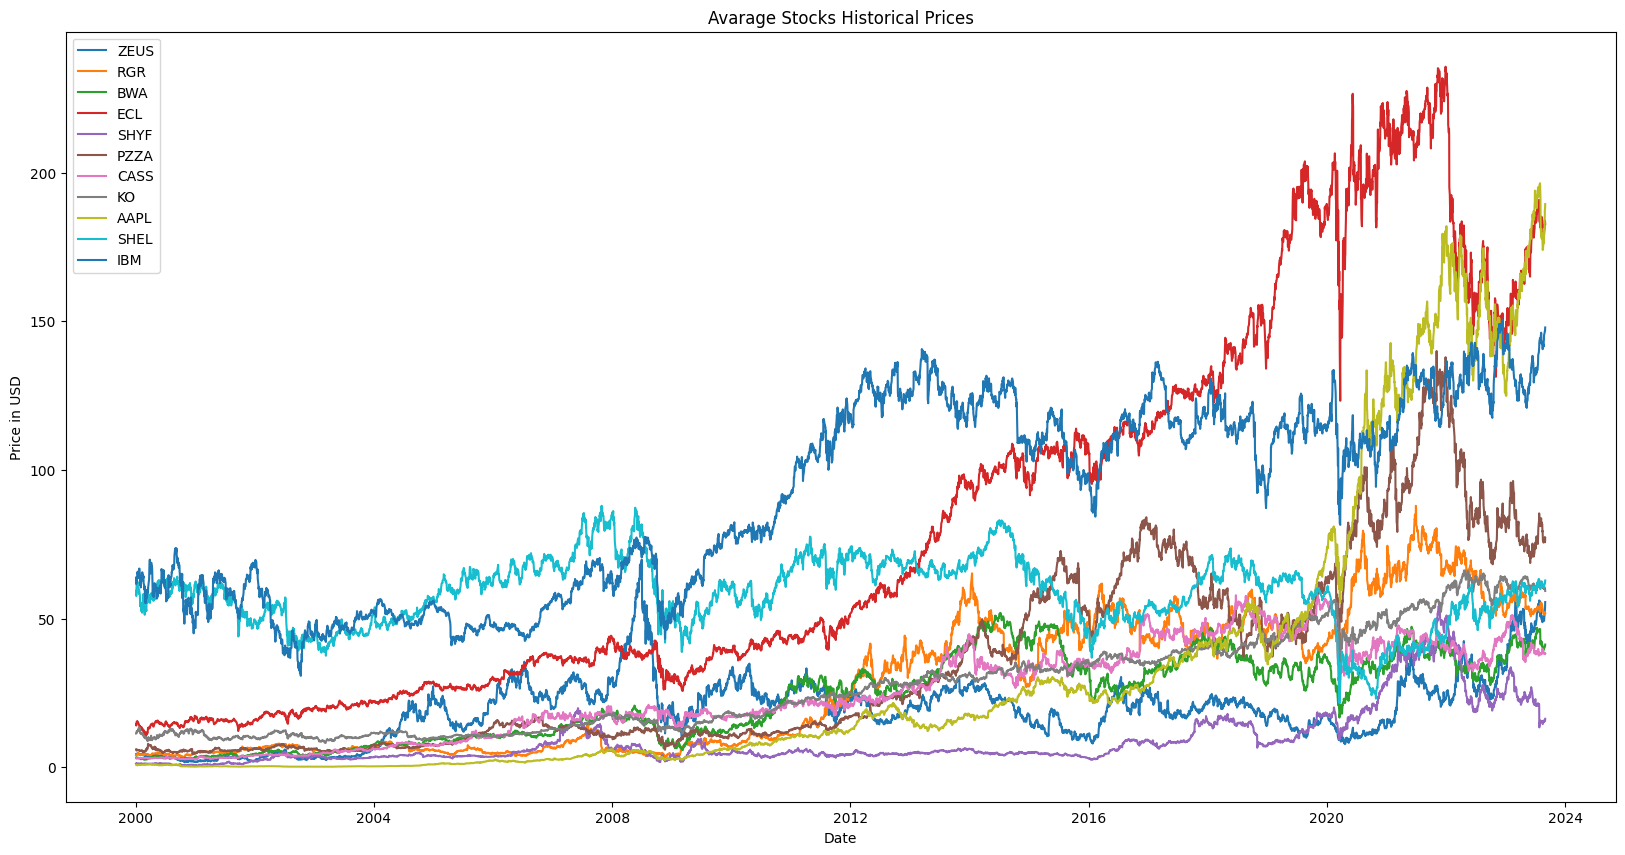

In [27]:
# Plot ETFs' prices
plt.figure(figsize=(20,10))

for column in Stocks_prices.columns[1:]:
    plt.plot(Stocks_prices.index, Stocks_prices[column], label=column)

plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.title("Avarage Stocks Historical Prices")
plt.show()

In [28]:
# Calculate daily returns and isu it for correlation

Stocks_prices_daily_change = Stocks_prices[[column for column in Stocks_prices.columns[1:]]].pct_change(1)
Stocks_prices_daily_change.head()

,ZEUS,RGR,BWA,ECL,SHYF,PZZA,CASS,KO,AAPL,SHEL,IBM
Date,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.000000,-0.006993,0.000000,-0.026534,-0.043796,-0.046729,-0.037736,0.001108,-0.084310,-0.029474,-0.033943
2000-01-05,0.000000,-0.014084,0.004847,0.039182,0.038168,-0.014706,0.000000,0.008860,0.014633,0.036876,0.035136
2000-01-06,-0.025974,0.000000,-0.012861,0.044262,0.051471,0.000000,0.000000,0.001098,-0.086538,0.020921,-0.017241
2000-01-07,0.066666,0.050000,0.027687,0.000000,-0.006993,0.022388,0.000000,0.065789,0.047369,0.033820,-0.004386


<Axes: >

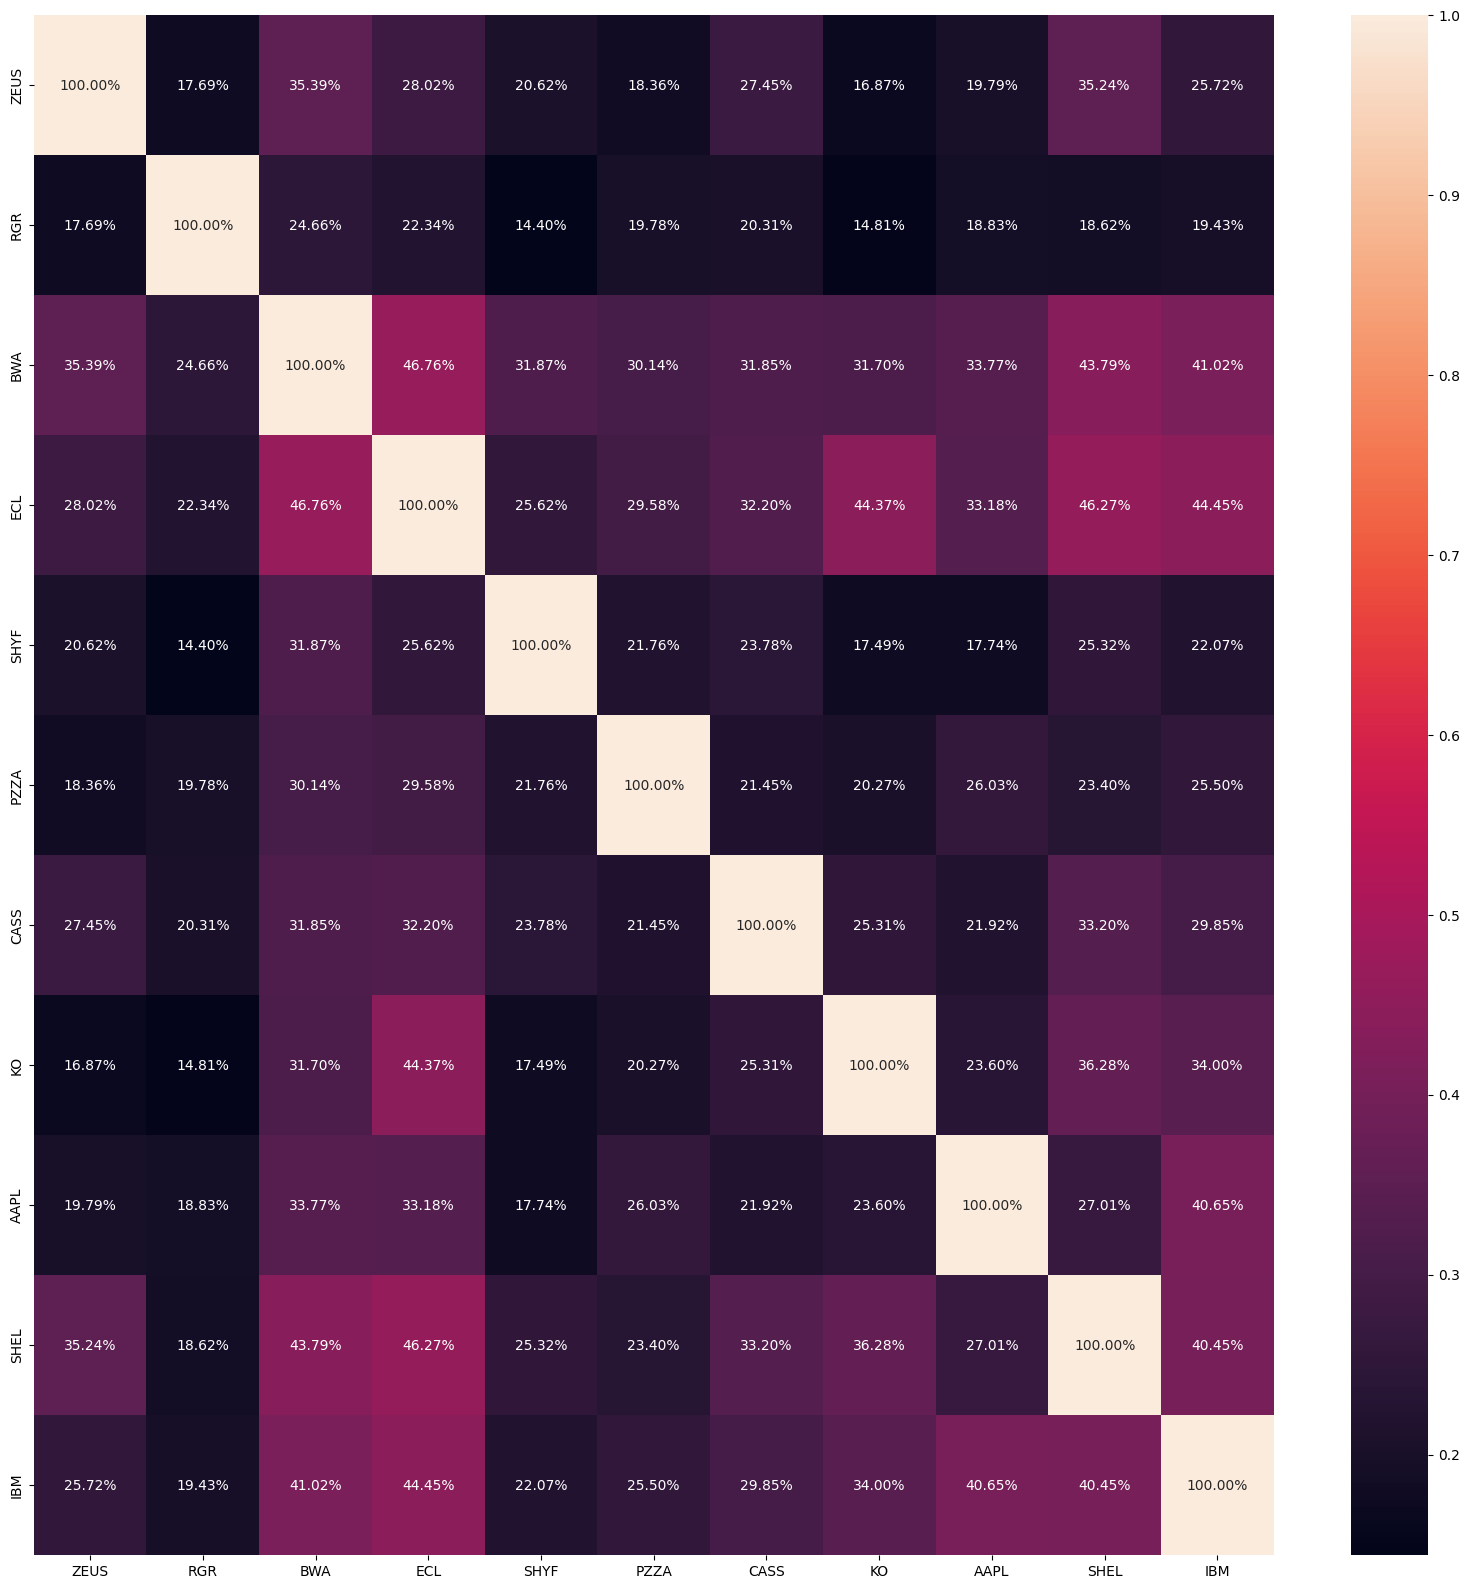

In [29]:
# Show the correlation
plt.subplots(figsize=(20,20))
sns.heatmap(Stocks_prices_daily_change.corr(), annot=True, fmt=".2%")

<Axes: >

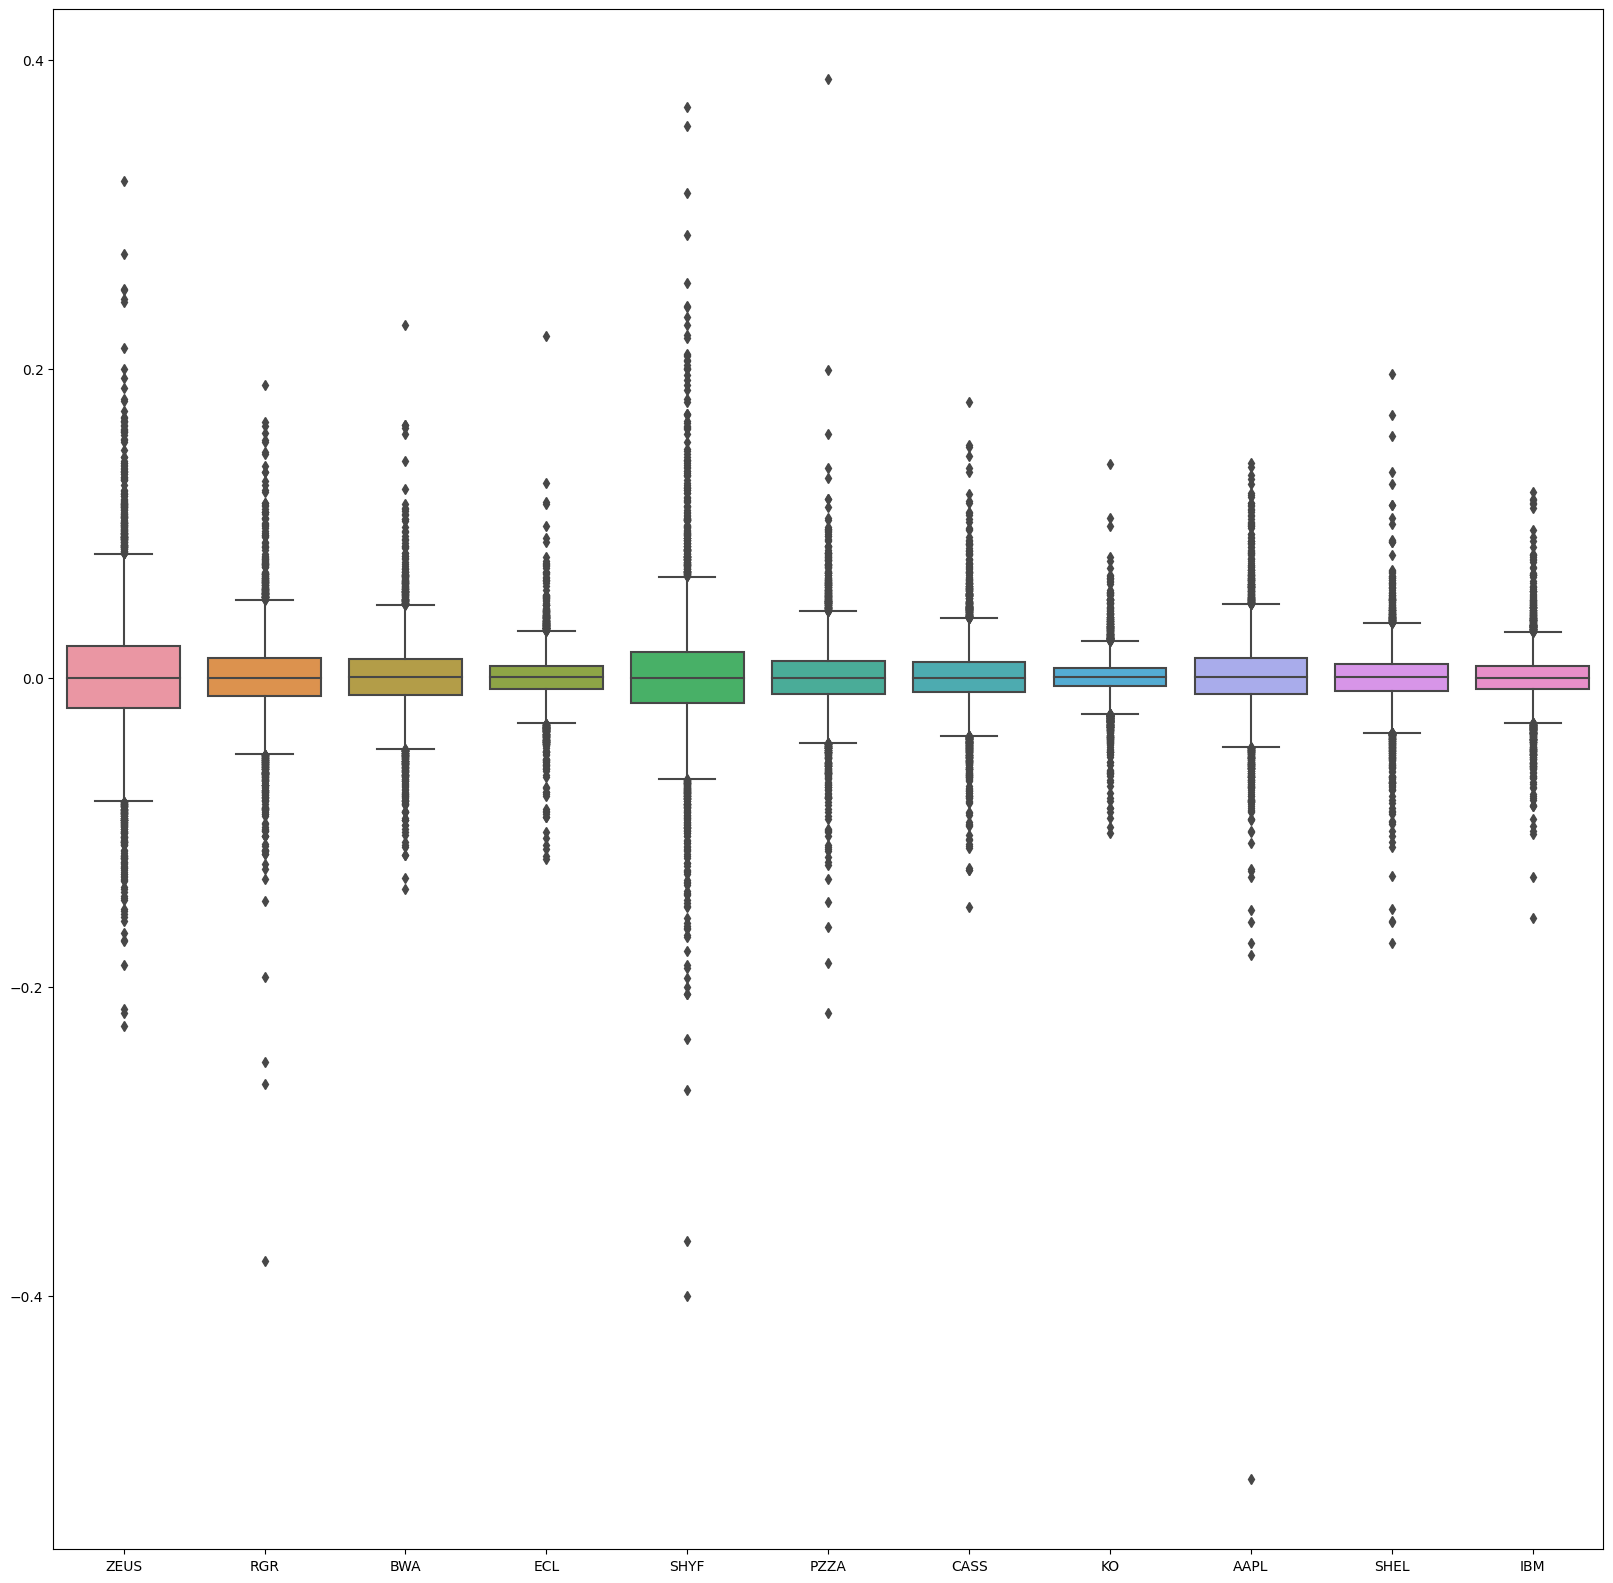

In [30]:
# Plot the returns width their percentiles
plt.subplots(figsize=(20,20))
sns.boxplot(Stocks_prices_daily_change)

In [31]:
# Check the co-variance for the symbols
Stocks_prices_daily_change.cov()

,ZEUS,RGR,BWA,ECL,SHYF,PZZA,CASS,KO,AAPL,SHEL,IBM
ZEUS,0.001567,0.000184,0.000322,0.000176,0.000309,0.000167,0.000233,0.000088,0.000195,0.000258,0.000167
RGR,0.000184,0.000694,0.000149,0.000093,0.000144,0.000120,0.000115,0.000051,0.000123,0.000091,0.000084
BWA,0.000322,0.000149,0.000527,0.000170,0.000278,0.000159,0.000157,0.000096,0.000193,0.000186,0.000154
ECL,0.000176,0.000093,0.000170,0.000251,0.000154,0.000108,0.000109,0.000092,0.000131,0.000136,0.000116
SHYF,0.000309,0.000144,0.000278,0.000154,0.001438,0.000190,0.000193,0.000087,0.000167,0.000177,0.000137
PZZA,0.000167,0.000120,0.000159,0.000108,0.000190,0.000531,0.000106,0.000061,0.000149,0.000100,0.000096
CASS,0.000233,0.000115,0.000157,0.000109,0.000193,0.000106,0.000460,0.000071,0.000117,0.000132,0.000105
KO,0.000088,0.000051,0.000096,0.000092,0.000087,0.000061,0.000071,0.000172,0.000077,0.000088,0.000073
AAPL,0.000195,0.000123,0.000193,0.000131,0.000167,0.000149,0.000117,0.000077,0.000618,0.000124,0.000166
SHEL,0.000258,0.000091,0.000186,0.000136,0.000177,0.000100,0.000132,0.000088,0.000124,0.000341,0.000123


In [32]:
# Calculate volatilitiy
Stocks_stats = pd.DataFrame()
Stocks_stats["Volatility"] = (Stocks_prices_daily_change.std() * 100)

# Calculate avarage daily returns %
Stocks_stats["Daily Return %"] = (Stocks_prices_daily_change.mean() * 100)

# Calculate avarage yearly returns % (approx to 252 avarage trading days / year)
Stocks_stats["Yearly Return %"] = (Stocks_prices_daily_change.mean() * 100 * 252)

Stocks_stats

,Volatility,Daily Return %,Yearly Return %
ZEUS,3.958510,0.120413,30.343988
RGR,2.633768,0.077949,19.643053
BWA,2.296525,0.068978,17.382415
ECL,1.584878,0.055159,13.900117
SHYF,3.791752,0.114222,28.783838
PZZA,2.303858,0.069161,17.428600
CASS,2.144626,0.065467,16.497573
KO,1.312269,0.036371,9.165557
AAPL,2.486965,0.122889,30.968136
SHEL,1.847852,0.018083,4.556985


<Figure size 4000x1000 with 0 Axes>

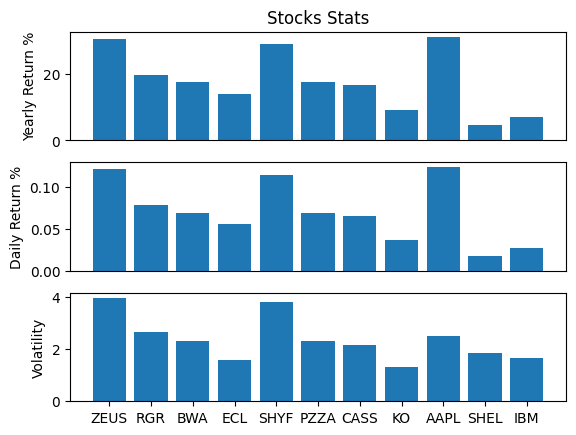

In [33]:
# Plot Stocks Stats

plt.figure(figsize=(40, 10))
fig, axis = plt.subplots(3, 1)


axis[2].bar(Stocks_stats.index, Stocks_stats["Volatility"])
axis[2].set_ylabel("Volatility")

axis[1].bar(Stocks_stats.index, Stocks_stats["Daily Return %"])
axis[1].set_ylabel("Daily Return %")
axis[1].xaxis.set_visible(False)

axis[0].set_title("Stocks Stats")
axis[0].bar(Stocks_stats.index, Stocks_stats["Yearly Return %"])
axis[0].set_ylabel("Yearly Return %")
axis[0].xaxis.set_visible(False)
plt.show()

### Save the temporary generated data objects for later use

In [34]:
# import libraries
import pickle

In [35]:
# dump objects
with open("3_2_etfs_prices.pckl", "wb") as f:
    %time pickle.dump(ETFs_prices, f)

CPU times: user 394 µs, sys: 279 µs, total: 673 µs
Wall time: 677 µs


In [36]:
# dump objects
with open("3_2_stocks_prices.pckl", "wb") as f:
    %time pickle.dump(Stocks_prices, f)

CPU times: user 636 µs, sys: 64 µs, total: 700 µs
Wall time: 704 µs
